In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Imports & Configs

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

# Data Preprocessing

In [3]:
df=pd.read_csv('airline_passenger_satisfaction.csv')
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [5]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [6]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


## Missing Data

In [8]:
total = df.shape[0]
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = df[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

Arrival Delay: 393 (0.303%)


Missing values are very few! we can just fill them with the median

In [9]:
df['Arrival Delay'].fillna(df['Arrival Delay'].median(), inplace=True)

## Duplicates 

In [10]:
df.duplicated().sum()

0

Great! No duplicates

## Outliers 

------------------------------
Flight Distance:


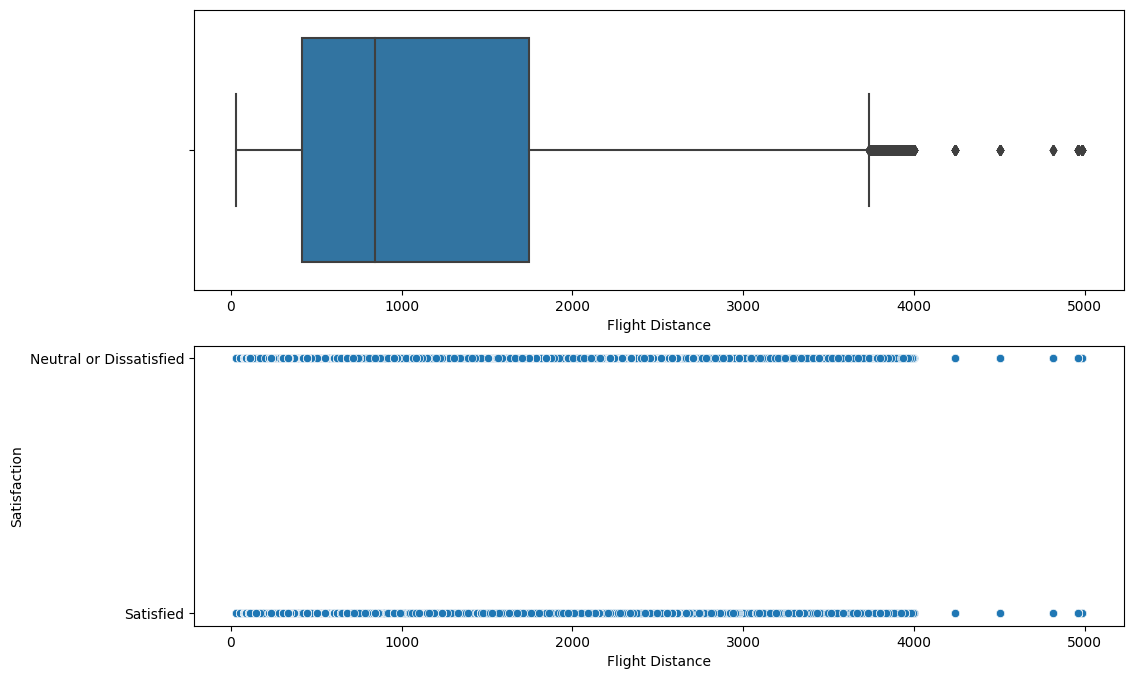

------------------------------
Departure Delay:


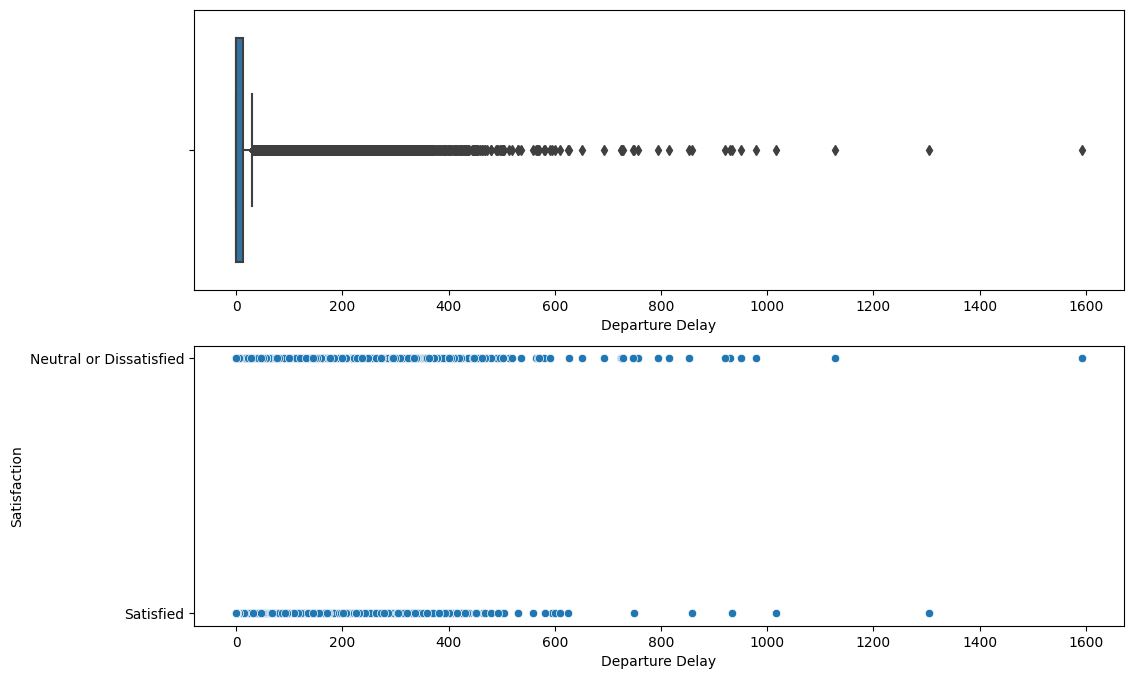

------------------------------
Arrival Delay:


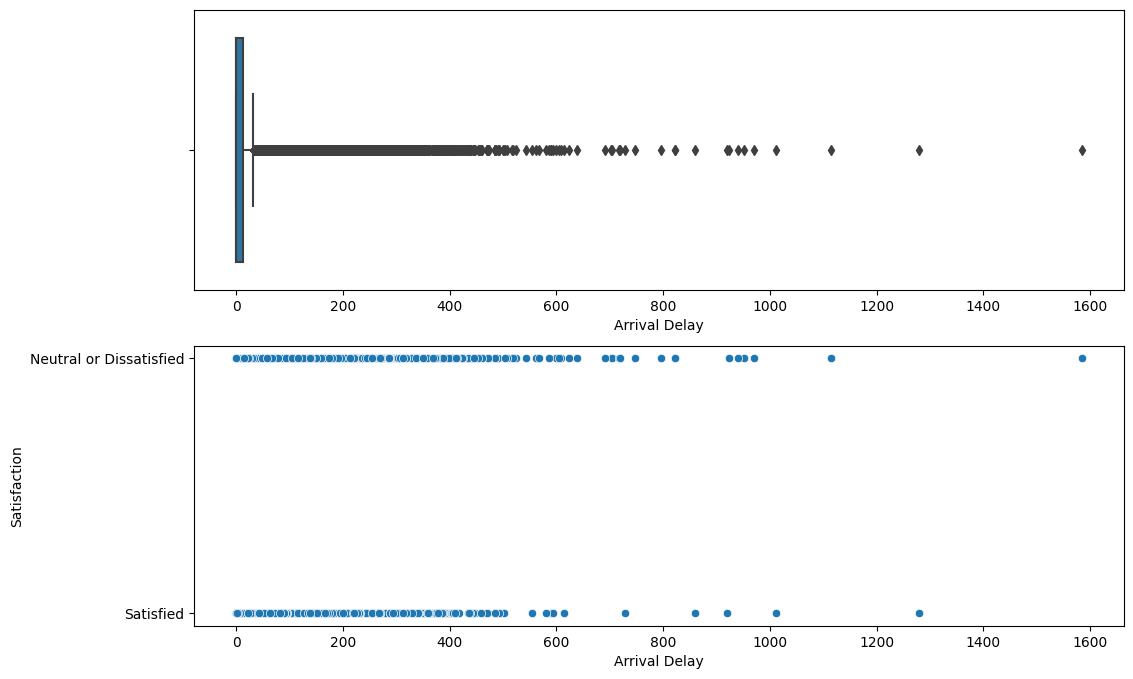

In [11]:
for col in df:
    if col != 'Satisfaction' and col in ['Flight Distance', 'Departure Delay', 'Arrival Delay']:
        print('-'*30)
        print(f"{col}:")
        fig, ax = plt.subplots(2, 1, figsize=(12, 8))
        g1 = sns.boxplot(x = df[col], ax=ax[0])
        g2 = sns.scatterplot(data=df, x=df[col],y=df['Satisfaction'], ax=ax[1])
        plt.show()

In [12]:
valid_data = {'Flight Distance': 4000, 'Departure Delay': 500, 'Arrival Delay': 500}

for k in valid_data:
    print(f'Number of outliers for {k} is {df[df[k] >= valid_data[k]].shape[0]}')

for k in valid_data:
    df = df[df[k] < valid_data[k]]

Number of outliers for Flight Distance is 90
Number of outliers for Departure Delay is 43
Number of outliers for Arrival Delay is 42


# EDA

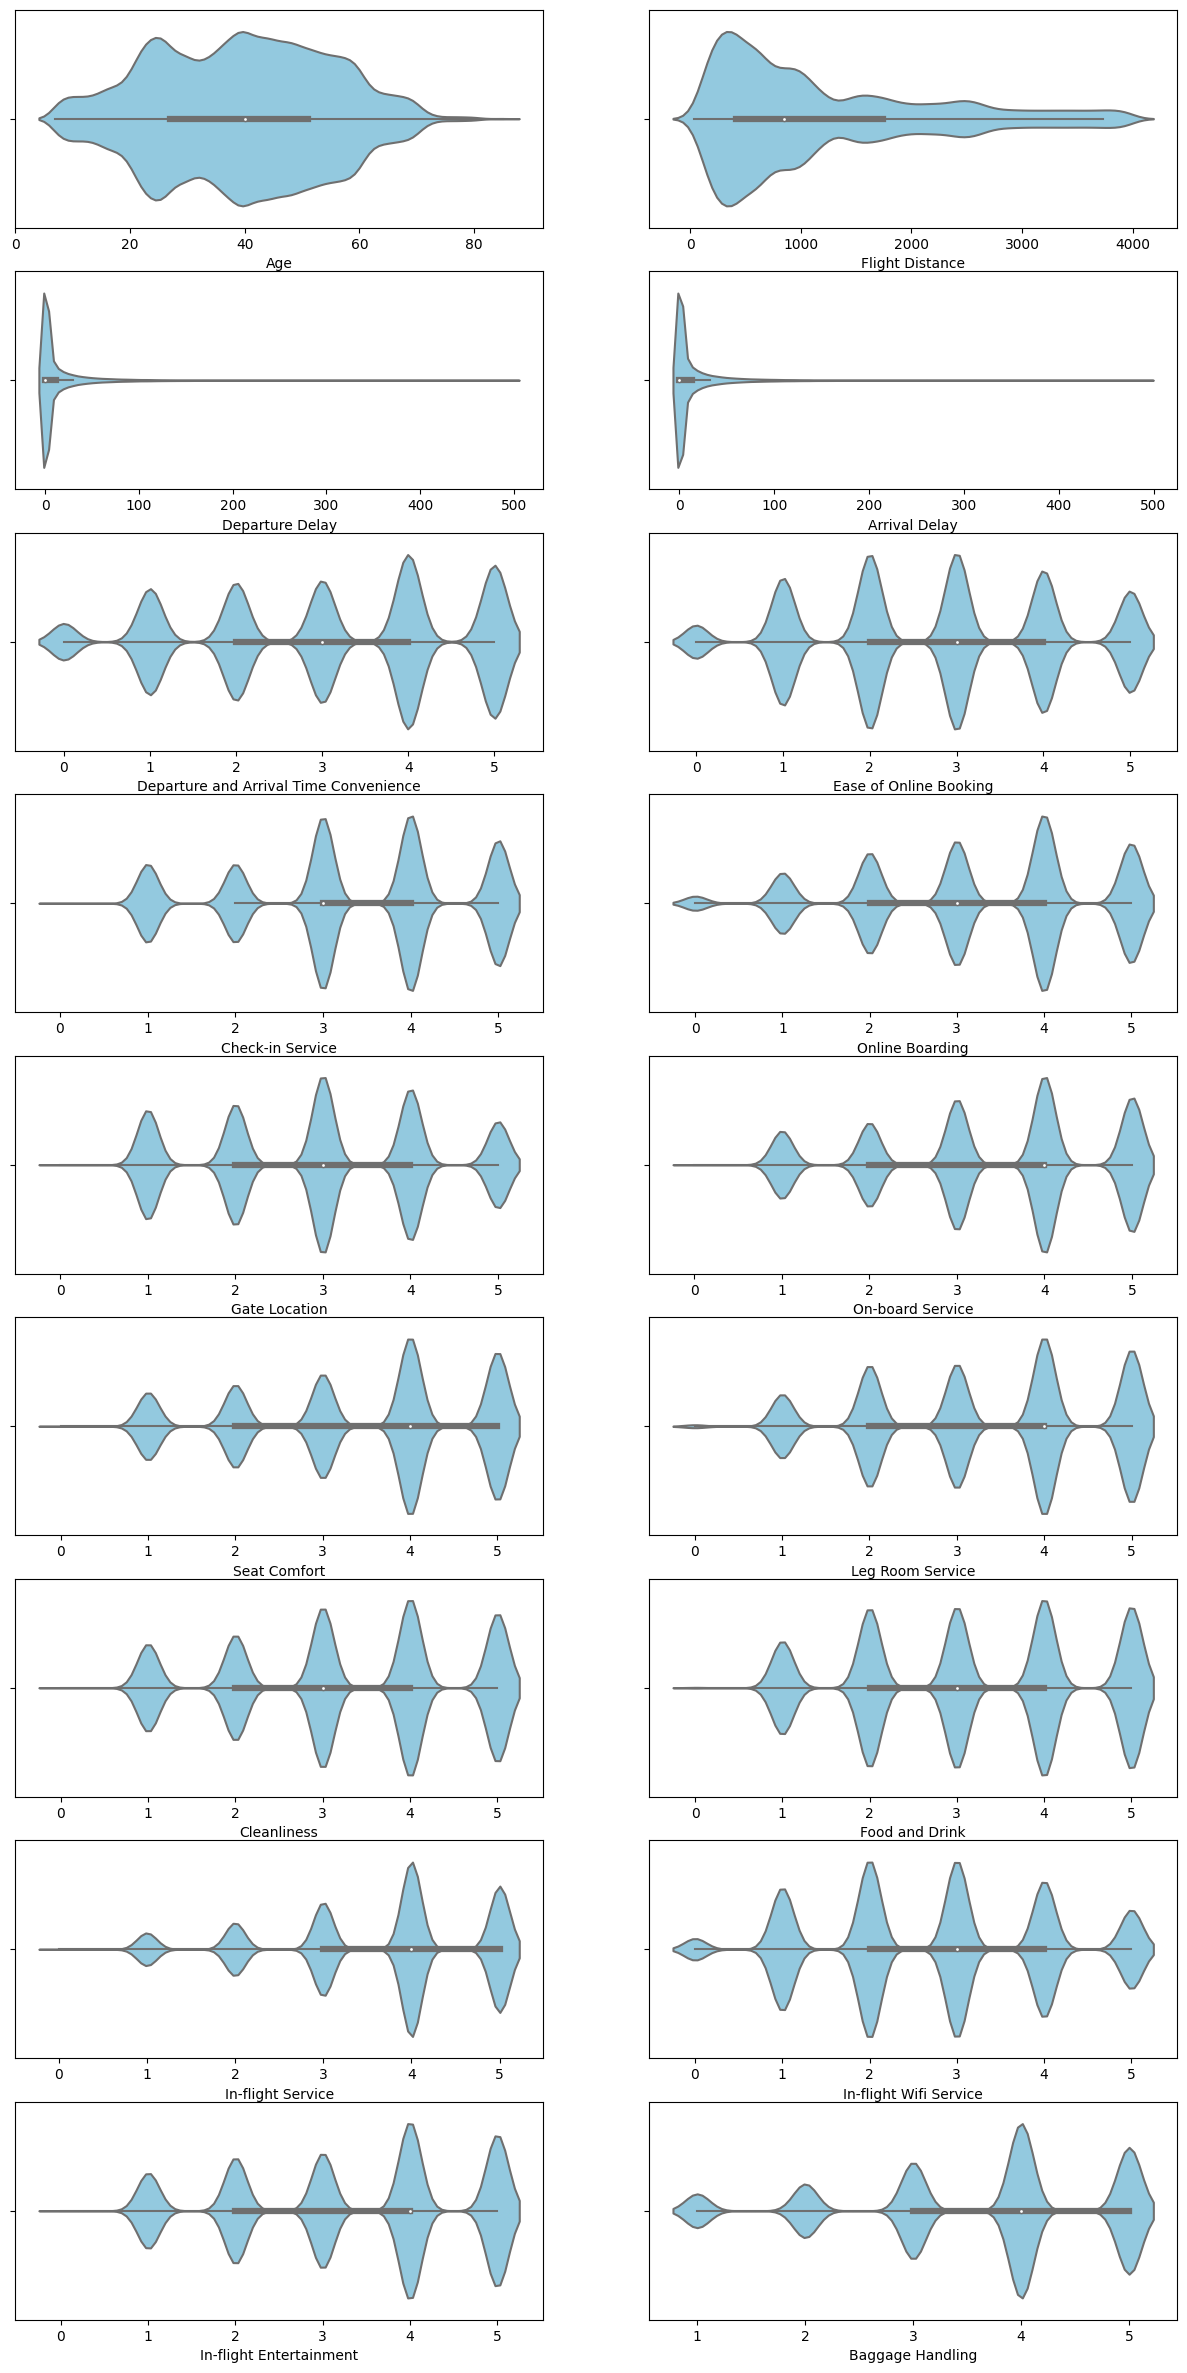

In [13]:
f, axes = plt.subplots(9, 2, figsize=(15,30), sharex=False)
idx, idy = 0, 0
for i in range(1,24):
    if is_numeric_dtype(df.iloc[:,i]):
        sns.violinplot(x=df.iloc[:,i], color="skyblue", ax=axes[idx,idy])
        idx += idy
        idy = int(not idy)
plt.show()

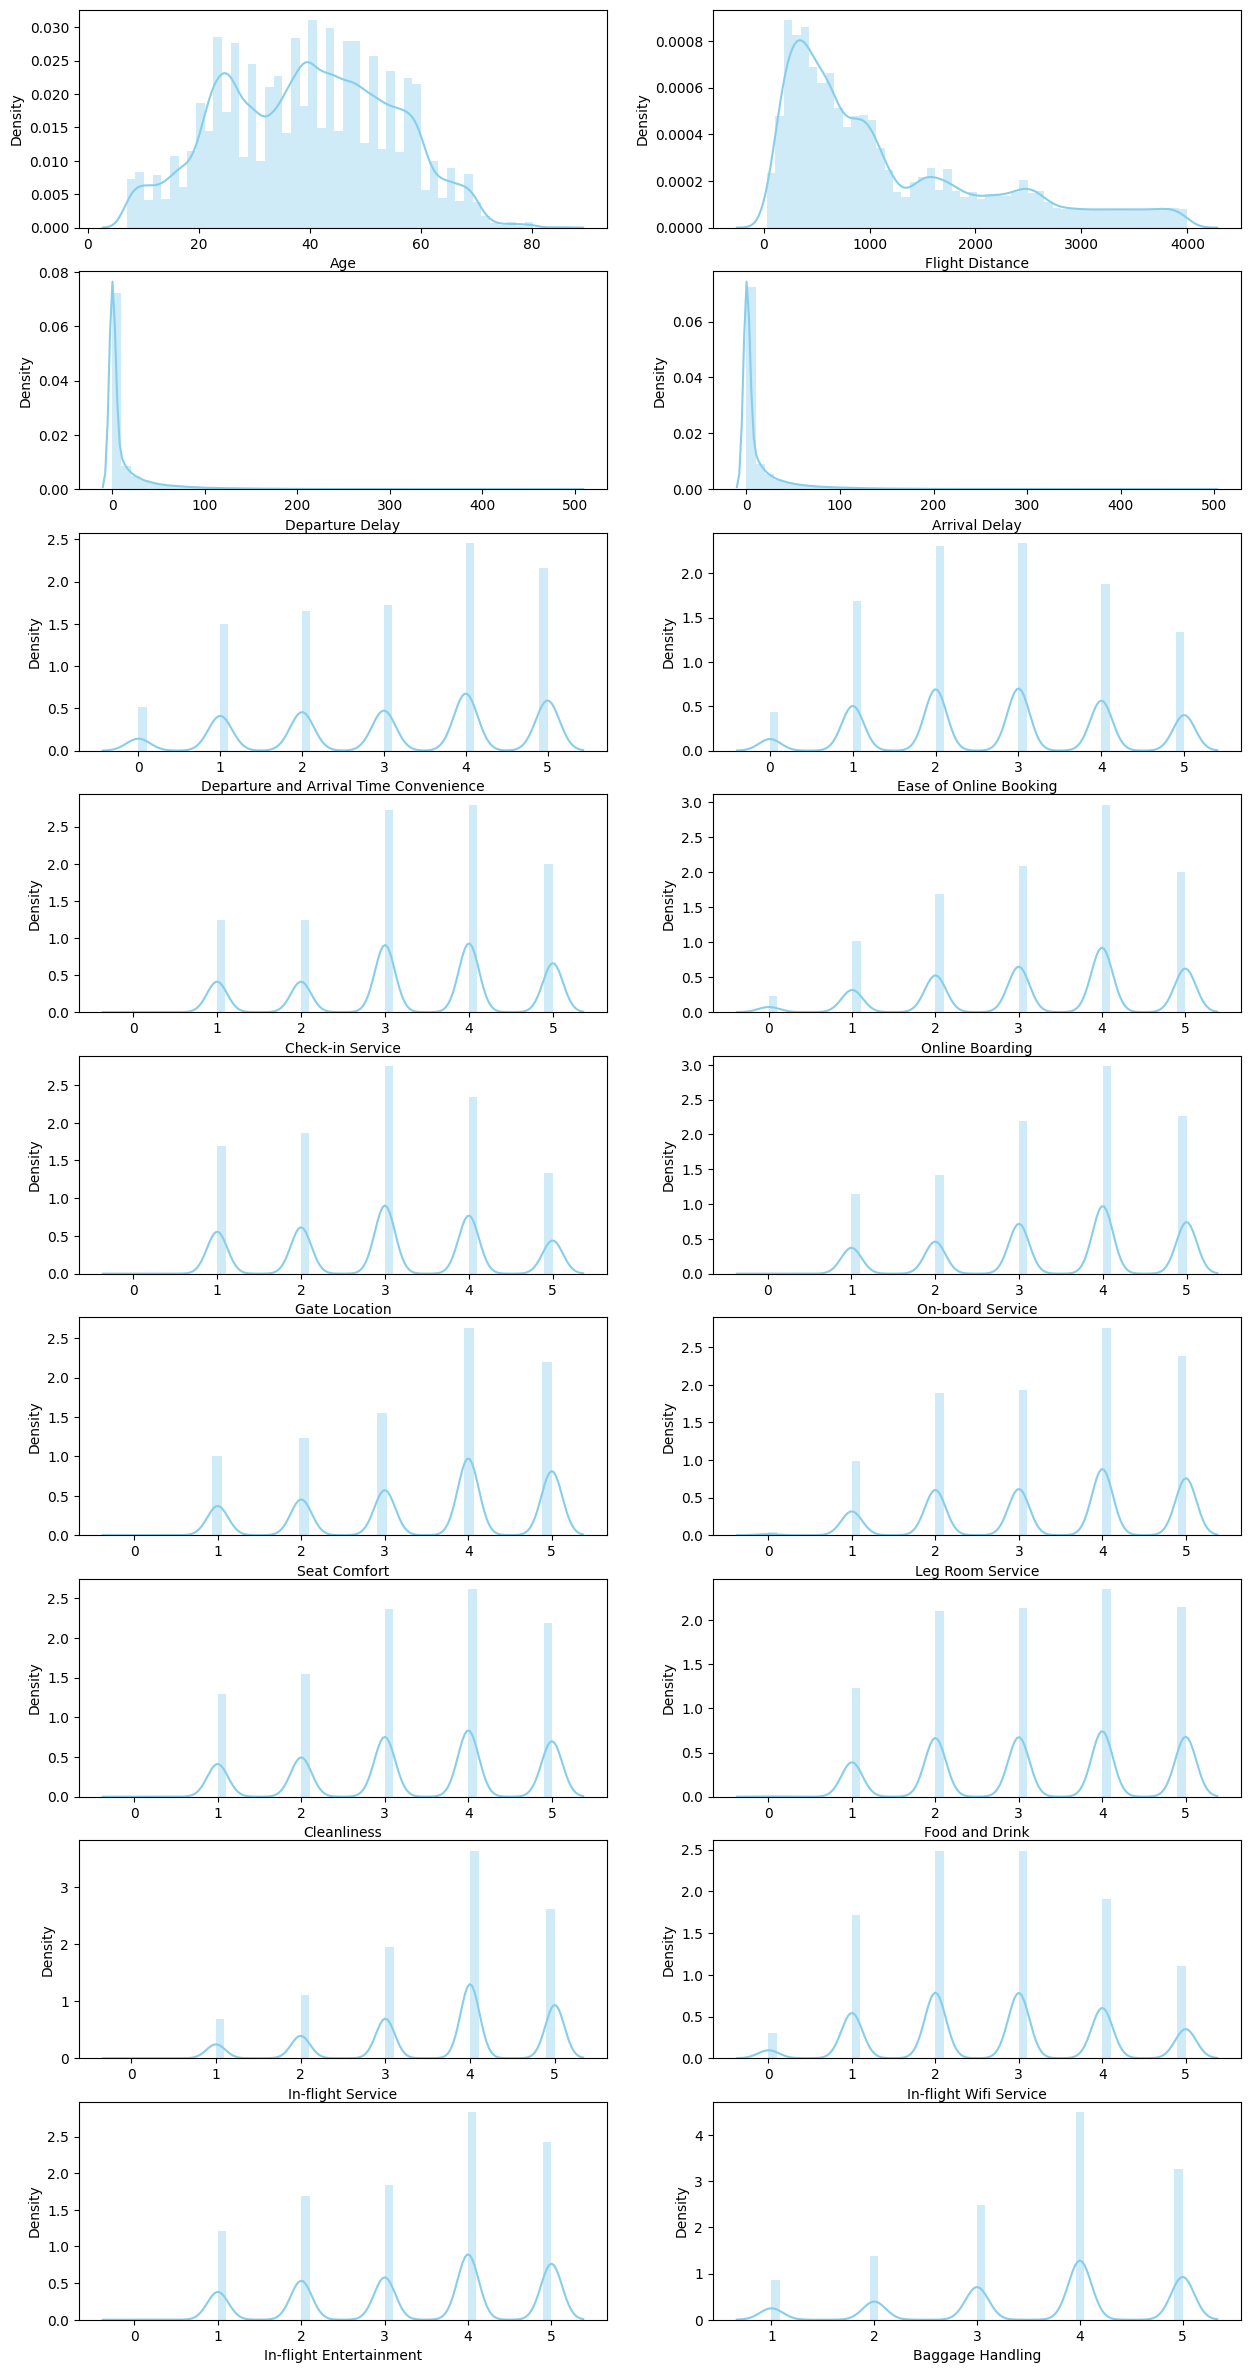

In [14]:
f, axes = plt.subplots(9, 2, figsize=(15,30), sharex=False)
idx, idy = 0, 0
for i in range(1, 24):
    if is_numeric_dtype(df.iloc[:,i]):
        plot = sns.distplot(x=df.iloc[:,i], color="skyblue", ax=axes[idx,idy])
        plot.set(xlabel=df.columns[i])
        idx += idy
        idy = int(not idy)
plt.show()

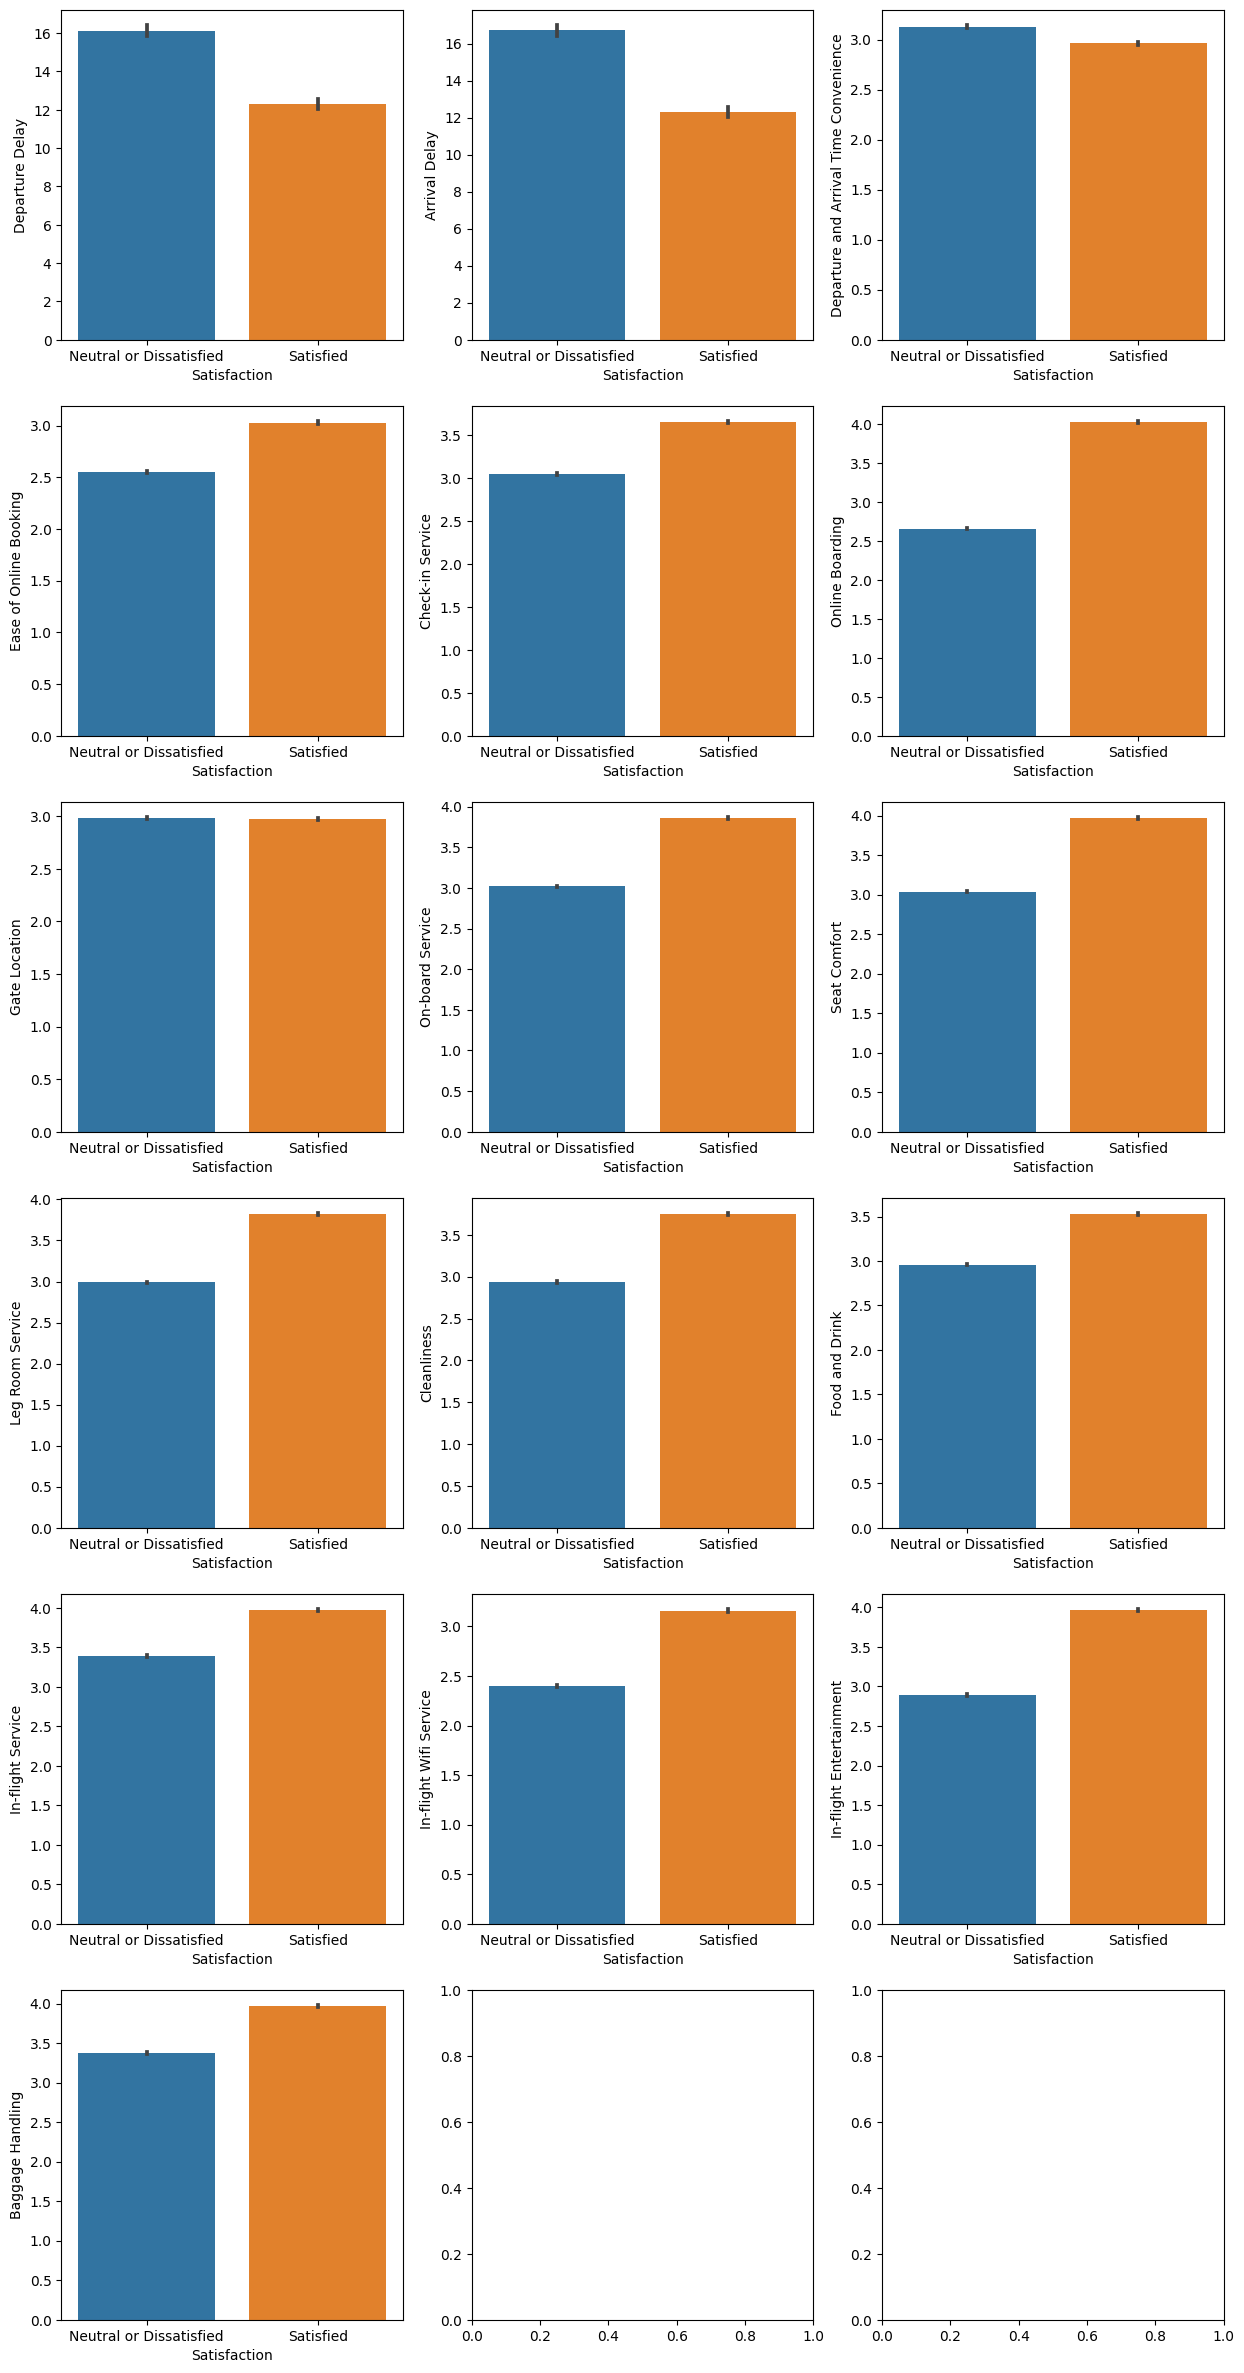

In [15]:
f, axes = plt.subplots(6, 3, figsize=(15,30), sharex=False)

idx, idy = 0, 0
for i in range(7, 24):
    if is_numeric_dtype(df.iloc[:,i]):
        sns.barplot(x="Satisfaction", y=df.columns[i], data=df, ax=axes[idx,idy])
        idx += 1 if idy == 2 else 0
        idy = idy + 1 if idy < 2 else 0
        
plt.show()

<AxesSubplot:>

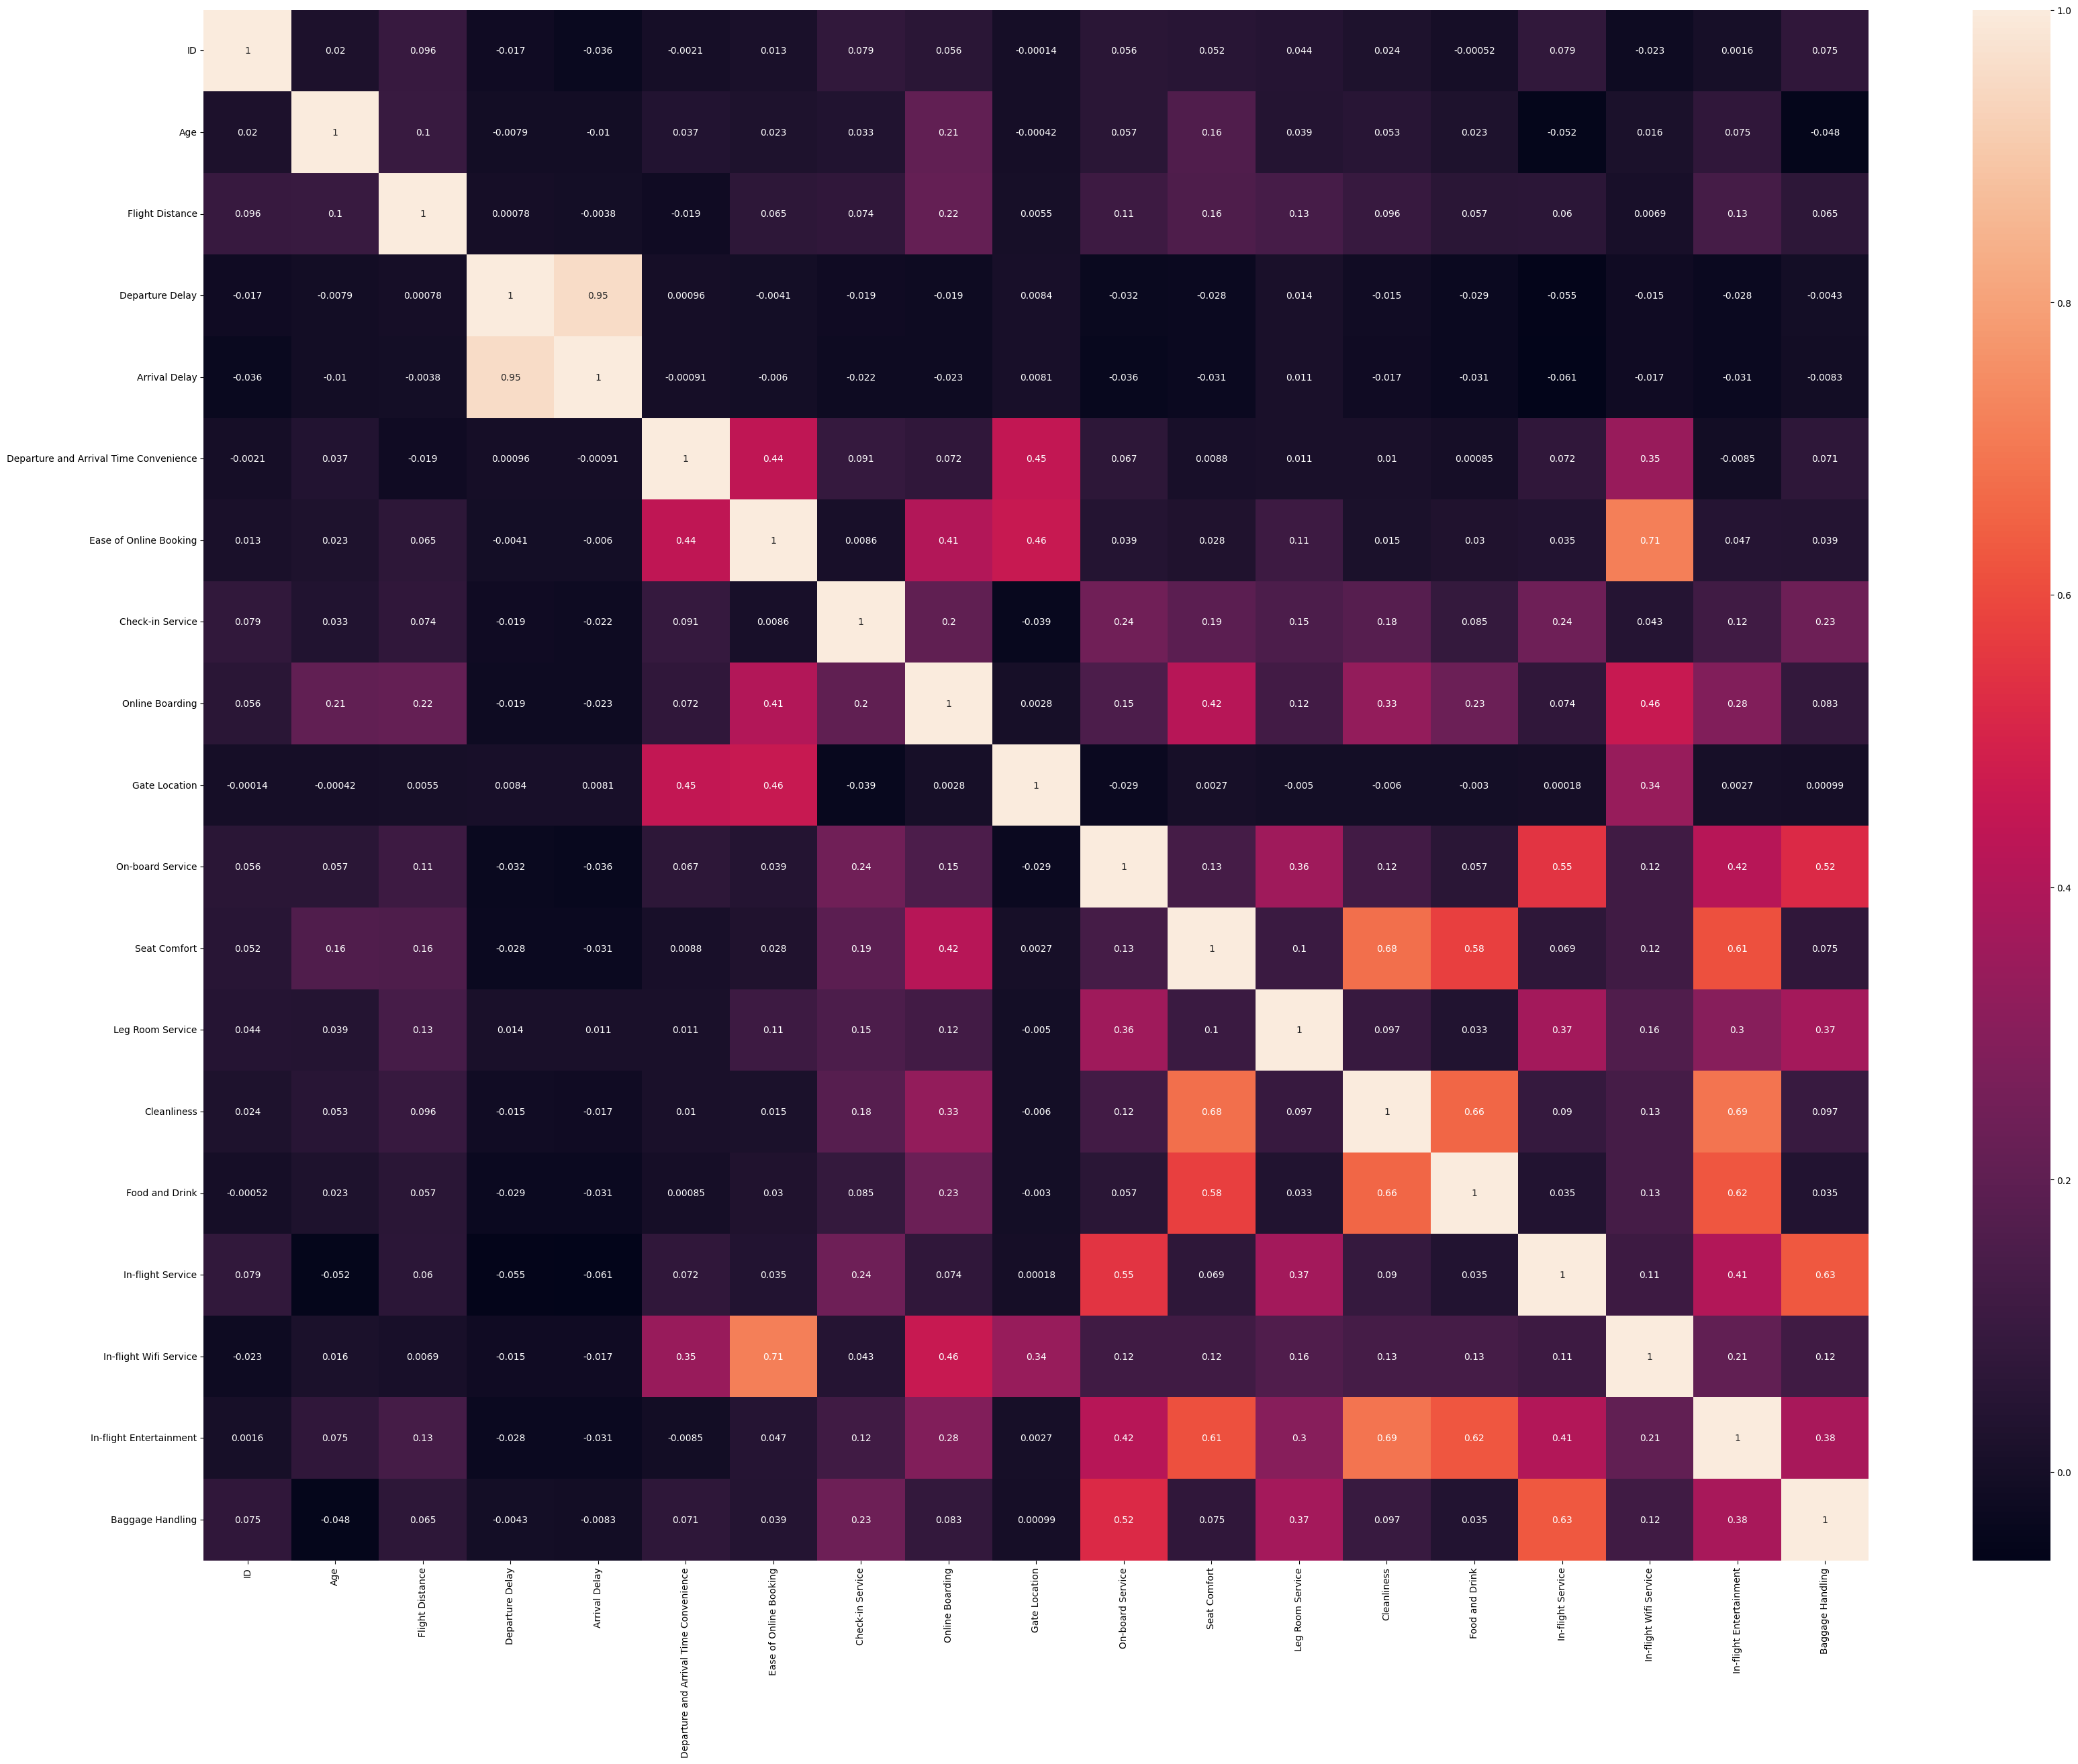

In [16]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), annot=True)

# import plotly.express as px
# fig = px.imshow(df.corr(), text_auto=True, aspect="auto")
# fig.show()

## Observations

- The customers Neutral or Dissatisfaction also increased with the increase in Departure Delay 
- The Demand for Business class and Business class passengers are more satisfied with the increase in flight distance 
- The customer satisfaction increased with the increase of Check-in Service 
- The customers Neutral or Dissatisfaction also increased with the increase in Arrival Delay 
- The customer satisfaction increased with the increase of Ease of Online Booking 
- The customer satisfaction increased with the increase of Seat Comfort 
- The customer satisfaction increased with the increase of Online Boarding 
- The customer satisfaction increased with the increase of Leg Room Service 
- The customer satisfaction increased with the increase of Cleanliness 
- The customer satisfaction increased with the increase of In-flight Wifi Service 
- The customer satisfaction increased with the increase of On-board Service 
- The customer satisfaction increased with the increase of In-flight Service 
- The customer satisfaction increased with the increase of Food and Drink 
- The customer satisfaction increased with the increase of In-flight Entertainment 
- The customer satisfaction increased with the increase of Baggage Handling 

# Label Encoding

In [17]:
for col in df.columns:
    if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])

In [18]:
df.drop(['ID'], axis = 1, inplace=True)
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,0,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,0,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1


# Split and scale data

In [19]:
x = df.drop(['Satisfaction'], axis=1)
y = df['Satisfaction']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.25, random_state=42)

In [21]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

# Modeling

### K Nearest Neighbors (KNN) classification model

In [22]:
best_KNN = [None, 0, 0]

for i in range(3, 20):
    KNN_model = KNeighborsClassifier(n_neighbors = i)
    KNN_model.fit(x_train, y_train)
    test_score = KNN_model.score(x_test, y_test)
    # print(f"At n_neighbors: {i}. Score: {test_score}")
    if test_score > best_KNN[2]:
        best_KNN[0] = KNN_model
        best_KNN[1] = i
        best_KNN[2] = test_score

print(f"The best model has n_neighbors: {best_KNN[1]}")
print(f"Best Model Train Score: {best_KNN[0].score(x_train, y_train)}")
print(f"Best Model Test Score: {best_KNN[0].score(x_test, y_test)}")

The best model has n_neighbors: 13
Best Model Train Score: 0.937816006905907
Best Model Test Score: 0.9309717597730917


### Logistic Regression Model

In [23]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [24]:
print(f"Training Score: {lg_model.score(x_train , y_train)}")
print(f"Test Score: {lg_model.score(x_test , y_test)}")

Training Score: 0.8737308340526987
Test Score: 0.8771118510297201


### Decision  Tree

In [25]:
best_dt = [None, (0, 0), 0]

for i in range(3, 24):
    for j in range(3, 10):
        dt = DecisionTreeClassifier(max_features=i, max_depth=j)
        dt.fit(x_train, y_train)
        test_score = dt.score(x_test, y_test)
        # print(f"At max_features: {i} and max_depth: {j}. Score: {test_score}")
        if test_score > best_dt[2]:
            best_dt[0] = dt
            best_dt[1] = (i, j)
            best_dt[2] = test_score

print(f"The best model has max features: {best_dt[1][0]} and max depth: {best_dt[1][1]}")
print(f"Best Model Train Score: {best_dt[0].score(x_train, y_train)}")
print(f"Best Model Test Score: {best_dt[0].score(x_test, y_test)}")

The best model has max features: 18 and max depth: 9
Best Model Train Score: 0.9490175525136679
Best Model Test Score: 0.945770131952152


[Text(0.45330028044871795, 0.95, 'X[11] <= 0.185\ngini = 0.491\nsamples = 97308\nvalue = [55029, 42279]'),
 Text(0.12034254807692307, 0.85, 'X[19] <= -1.676\ngini = 0.256\nsamples = 49035\nvalue = [41649, 7386]'),
 Text(0.057291666666666664, 0.75, 'X[20] <= -2.14\ngini = 0.009\nsamples = 1702\nvalue = [8, 1694]'),
 Text(0.054086538461538464, 0.65, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.06049679487179487, 0.65, 'gini = 0.0\nsamples = 1694\nvalue = [0, 1694]'),
 Text(0.1833934294871795, 0.75, 'X[19] <= 0.579\ngini = 0.212\nsamples = 47333\nvalue = [41641, 5692]'),
 Text(0.06690705128205128, 0.65, 'X[3] <= 0.412\ngini = 0.123\nsamples = 42885\nvalue = [40066, 2819]'),
 Text(0.06370192307692307, 0.55, 'X[2] <= -0.82\ngini = 0.206\nsamples = 24149\nvalue = [21330, 2819]'),
 Text(0.024839743589743588, 0.45, 'X[1] <= -0.196\ngini = 0.028\nsamples = 11332\nvalue = [11172, 160]'),
 Text(0.009615384615384616, 0.35, 'X[5] <= -0.264\ngini = 0.01\nsamples = 7999\nvalue = [7958, 41]'),


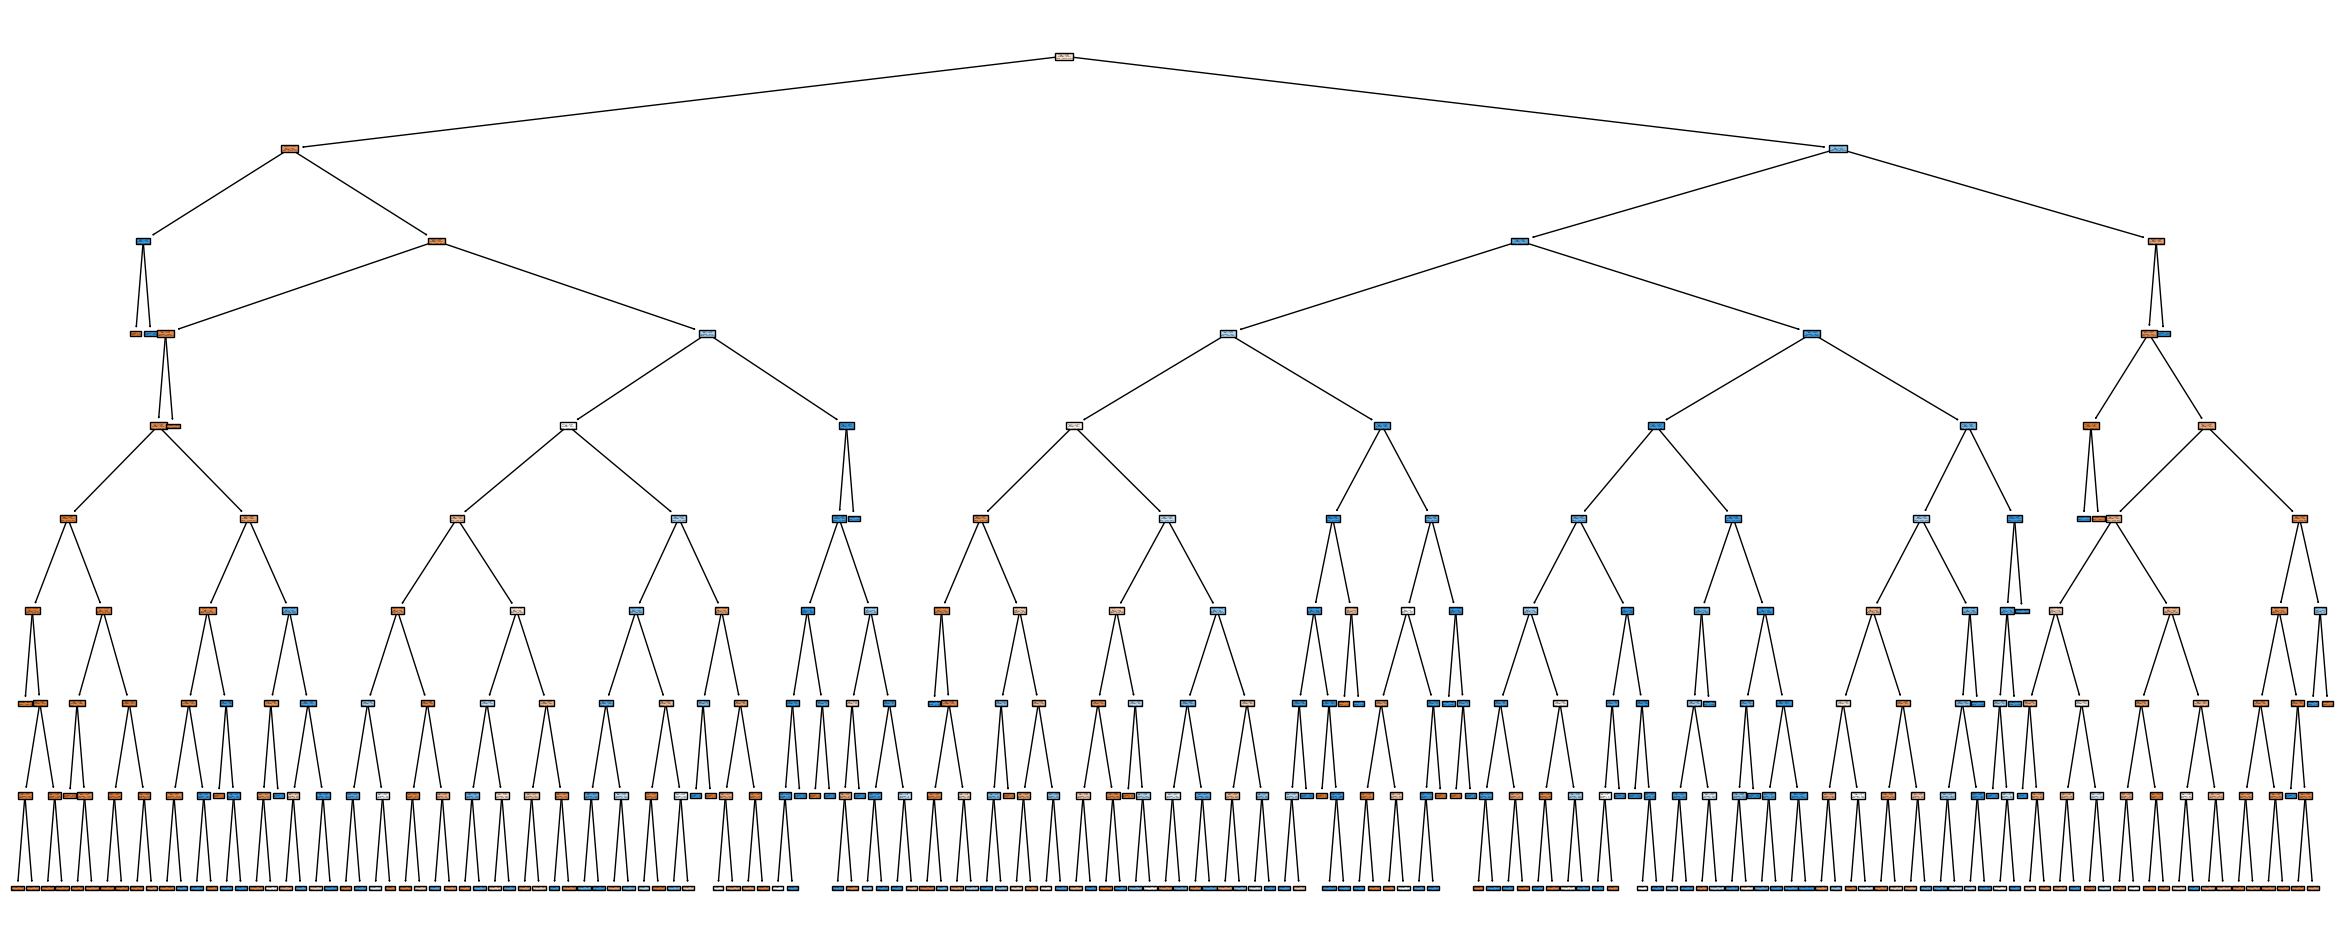

In [26]:
fig = plt.figure(figsize = (30,12))
tree.plot_tree(best_dt[0], filled=True)

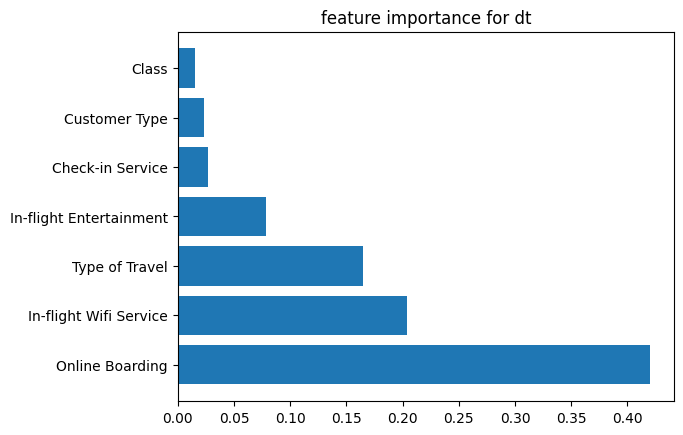

In [27]:
from matplotlib import pyplot as plt

def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

# whatever your features are called
features_names = x.columns

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importance(abs(best_dt[0].feature_importances_), features_names, top=7)

### Random Forest Classifier

In [ ]:
best_rf = [None, (0, 0), 0]

for i in range(3, 24):
    for j in range(3, 10):
        rf = RandomForestClassifier(max_features=i, max_depth=j)
        rf.fit(x_train, y_train)
        test_score = rf.score(x_test, y_test)
        # print(f"At max_features: {i} and max_depth: {j}. Score: {test_score}")
        if test_score > best_rf[2]:
            best_rf[0] = rf
            best_rf[1] = (i, j)
            best_rf[2] = test_score

print(f"The best Random Forest has max features: {best_rf[1][0]} and max depth: {best_rf[1][1]}")
print(f"Best Random Forest Train Score: {best_rf[0].score(x_train, y_train)}")
print(f"Best Random Forest Test Score: {best_rf[0].score(x_test, y_test)}")

In [31]:
rf = RandomForestClassifier(max_features=18, max_depth=9)
rf.fit(x_train, y_train)

print(f"Random Forest Train Score: {rf.score(x_train, y_train)}")
print(f"Random Forest Test Score: {rf.score(x_test, y_test)}")

Random Forest Train Score: 0.9524191227853825
Random Forest Test Score: 0.949253915402639


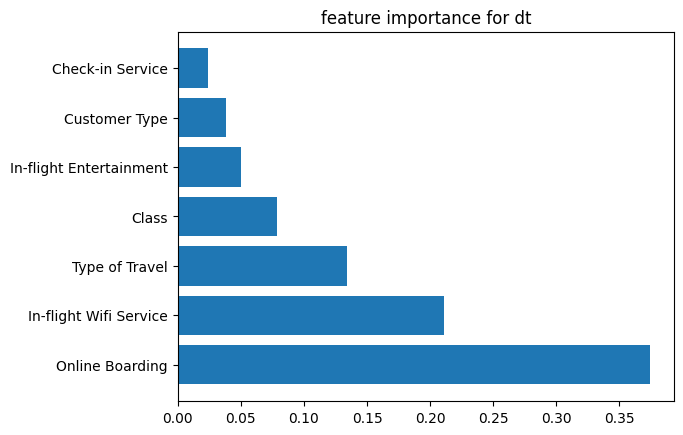

In [32]:
from matplotlib import pyplot as plt

def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

# whatever your features are called
features_names = x.columns

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importance(abs(rf.feature_importances_), features_names, top=7)

**Conclusion**: The best model for this problem is a decision tree with max_features: 23 and max_depth: 9

In [32]:
# 1. Define an objective function to be maximized.
def objective(trial):
    # 2. Suggest values for the hyperparameters using a trial object.
    classifier_name = trial.suggest_categorical('clasasdsifier', ['RandomForest', 'KNN', 'DecisionTree'])
    if classifier_name == "RandomForest":
        rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=True)
        rf_max_features = trial.suggest_int('rf_max_features', 2, 23, log=True)
        rf_n_estimators = trial.suggest_int('rf_n_estimators', 3, 20, log=True)
        classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth, n_estimators = rf_n_estimators)
    elif classifier_name == "KNN":
        n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 32, log=True)
        classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    else:
        dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=True)
        dt_max_features = trial.suggest_int('dt_max_features', 2, 23, log=True)
        classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)

    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print(study.best_trial)

[I 2022-09-09 00:34:27,442] A new study created in memory with name: no-name-7aae8cdd-d094-44e3-a62b-6cf9a93148cf
[I 2022-09-09 00:34:33,307] Trial 0 finished with value: 0.926378098409175 and parameters: {'clasasdsifier': 'KNN', 'KNN_n_neighbors': 6}. Best is trial 0 with value: 0.926378098409175.
[I 2022-09-09 00:34:40,351] Trial 1 finished with value: 0.915464298927118 and parameters: {'clasasdsifier': 'KNN', 'KNN_n_neighbors': 2}. Best is trial 0 with value: 0.926378098409175.
[I 2022-09-09 00:34:47,554] Trial 2 finished with value: 0.9309717597730917 and parameters: {'clasasdsifier': 'KNN', 'KNN_n_neighbors': 13}. Best is trial 2 with value: 0.9309717597730917.
[I 2022-09-09 00:34:55,440] Trial 3 finished with value: 0.926378098409175 and parameters: {'clasasdsifier': 'KNN', 'KNN_n_neighbors': 6}. Best is trial 2 with value: 0.9309717597730917.
[I 2022-09-09 00:34:55,808] Trial 4 finished with value: 0.9307559501788136 and parameters: {'clasasdsifier': 'DecisionTree', 'dt_max_dept

FrozenTrial(number=46, values=[0.9624799605376742], datetime_start=datetime.datetime(2022, 9, 9, 0, 36, 37, 297469), datetime_complete=datetime.datetime(2022, 9, 9, 0, 36, 40, 53883), params={'clasasdsifier': 'RandomForest', 'rf_max_depth': 22, 'rf_max_features': 6, 'rf_n_estimators': 18}, distributions={'clasasdsifier': CategoricalDistribution(choices=('RandomForest', 'KNN', 'DecisionTree')), 'rf_max_depth': IntDistribution(high=32, log=True, low=2, step=1), 'rf_max_features': IntDistribution(high=32, log=True, low=2, step=1), 'rf_n_estimators': IntDistribution(high=20, log=True, low=3, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=46, state=TrialState.COMPLETE, value=None)
